In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import rcParams
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [63]:
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Data Exploration

In [64]:

data_test=pd.read_csv("ac_test_data.csv")
print(data_test.shape)
print(data_test.isnull().values.any())
print(data_test.isnull().sum())

data_test=data_test.drop(['Unnamed: 0'],axis = 1)

(105540, 12)
False
Unnamed: 0    0
load          0
ac            0
hourofday     0
dayofweek     0
dif           0
absdif        0
max           0
var           0
entropy       0
nonlinear     0
hurst         0
dtype: int64


In [65]:
data_train=pd.read_csv("ac_train_data.csv")
print(data_train.shape)
print(data_train.isnull().values.any())
print(data_train.isnull().sum())

data_train=data_train.drop(['Unnamed: 0'],axis = 1)

(417720, 12)
False
Unnamed: 0    0
load          0
ac            0
hourofday     0
dayofweek     0
dif           0
absdif        0
max           0
var           0
entropy       0
nonlinear     0
hurst         0
dtype: int64


In [66]:
data_train.describe()

,load,ac,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst
count,417720.000000,417720.000000,417720.000000,4.177200e+05,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000
mean,2.184664,0.242265,11.484487,-7.038207e-07,0.159578,3.977086,1.871247,0.707766,1.468806,0.972744
std,1.890565,0.428454,6.920358,5.309284e-01,0.506379,2.131094,1.787633,0.094367,2.610744,0.065439
min,0.298000,0.000000,0.000000,-7.970000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.807000,0.000000,5.000000,-1.100000e-02,0.002000,1.786000,0.077337,0.645582,0.271757,0.987936
50%,1.279000,0.000000,11.000000,-1.000000e-03,0.010000,4.652000,1.984612,0.676446,0.698592,0.992059
75%,3.358000,0.000000,17.000000,8.000000e-03,0.043000,5.446000,3.508556,0.740986,1.598501,0.993138
max,11.794000,1.000000,23.000000,7.619000e+00,7.970000,11.794000,16.344863,0.999987,54.611741,0.996802


In [67]:
data_train.dtypes

load         float64
ac             int64
hourofday      int64
dayofweek     object
dif          float64
absdif       float64
max          float64
var          float64
entropy      float64
nonlinear    float64
hurst        float64
dtype: object

In [68]:
data_train.head(10)

,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041
5,2.259,0,0,Sun,-0.011,0.011,6.215,3.298258,0.626956,0.089788,0.993986
6,2.250,0,0,Sun,-0.009,0.009,6.215,3.289135,0.640121,0.085276,0.993927
7,2.251,0,0,Sun,0.001,0.001,6.215,3.238982,0.651916,0.354203,0.992703
8,2.264,0,0,Sun,0.013,0.013,6.215,3.203236,0.655600,0.372529,0.992474
9,2.277,0,0,Sun,0.013,0.013,6.215,3.196127,0.650006,0.366578,0.992308


In [69]:
data_train=data_train.drop(['load'],axis = 1)
data_train=data_train.drop(['hourofday'],axis = 1)
data_train=data_train.drop(['dayofweek'],axis = 1)

In [70]:
data_test=data_test.drop(['load'],axis = 1)
data_test=data_test.drop(['hourofday'],axis = 1)
data_test=data_test.drop(['dayofweek'],axis = 1)

In [71]:
#X_train = data_train.drop('ac', axis=1)
#y_train = data_train['ac']
X_test=data_test.drop('ac', axis=1)
y_test=data_test['ac']
print(type(X_train))

print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [72]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Feature Importance 1

In [73]:
#co efficient base feature importance
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

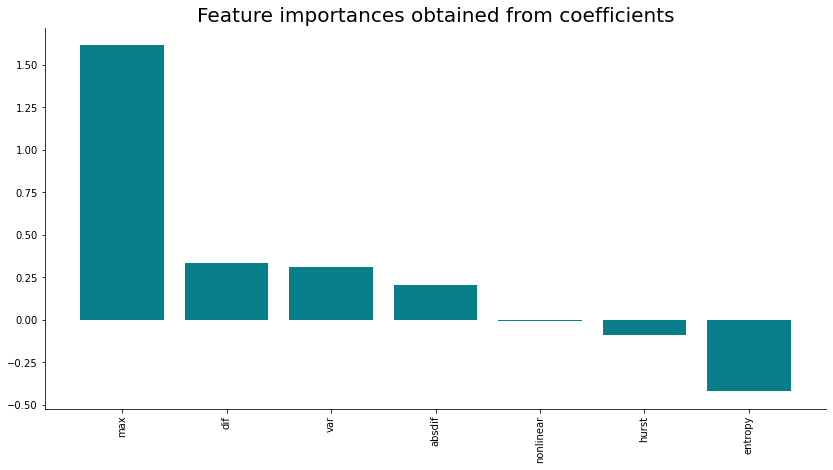

In [74]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Feature Importance 2

In [75]:
#boosing and tree based feature importance calculation
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


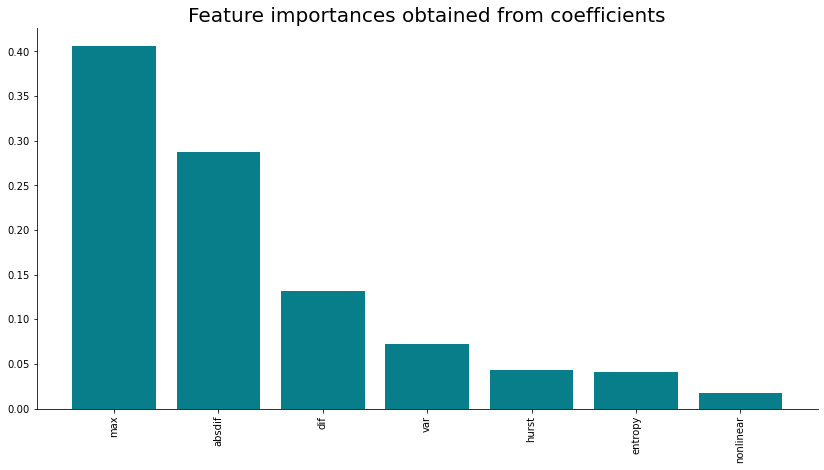

In [76]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Supervised Method Results

In [77]:
#knn result
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)


print(classification_report(y_test, predictions_knn))
print(confusion_matrix(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     96221
           1       0.36      0.38      0.37      9319

    accuracy                           0.88    105540
   macro avg       0.65      0.66      0.65    105540
weighted avg       0.89      0.88      0.89    105540

[[89851  6370]
 [ 5769  3550]]


In [78]:
#decission tree result
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     96221
           1       0.38      0.46      0.42      9319

    accuracy                           0.89    105540
   macro avg       0.66      0.69      0.68    105540
weighted avg       0.90      0.89      0.89    105540

[[89214  7007]
 [ 5035  4284]]


In [79]:
#logistic regression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
predicts_logistic=clf.predict(X_test)
print(classification_report(y_test, predicts_logistic))
print(confusion_matrix(y_test, predicts_logistic))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     96221
           1       0.39      0.31      0.34      9319

    accuracy                           0.90    105540
   macro avg       0.66      0.63      0.64    105540
weighted avg       0.89      0.90      0.89    105540

[[91728  4493]
 [ 6453  2866]]


# Ensemble result

In [80]:
#adaboost
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_clf.fit(X_train, y_train)
predicts_adaboost=adb_clf.predict(X_test)
print(classification_report(y_test, predicts_adaboost))
print(confusion_matrix(y_test, predicts_adaboost))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     96221
           1       0.41      0.48      0.44      9319

    accuracy                           0.89    105540
   macro avg       0.68      0.71      0.69    105540
weighted avg       0.90      0.89      0.90    105540

[[89714  6507]
 [ 4814  4505]]


In [81]:
#gradientboosting
clf_gradboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
predicts_gradboost=clf_gradboost.predict(X_test)
print(classification_report(y_test, predicts_gradboost))
print(confusion_matrix(y_test, predicts_gradboost))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     96221
           1       0.41      0.49      0.44      9319

    accuracy                           0.89    105540
   macro avg       0.68      0.71      0.69    105540
weighted avg       0.90      0.89      0.90    105540

[[89609  6612]
 [ 4786  4533]]


In [82]:
#extratree classifier
clf_ext = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(X_train, y_train)
predicts_ext=clf_ext.predict(X_test)
print(classification_report(y_test, predicts_ext))
print(confusion_matrix(y_test, predicts_ext))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     96221
           1       0.45      0.36      0.40      9319

    accuracy                           0.90    105540
   macro avg       0.69      0.66      0.67    105540
weighted avg       0.90      0.90      0.90    105540

[[92021  4200]
 [ 5939  3380]]
